In [2]:
%run SAT_help_functions.ipynb

In [146]:
prior = utils.BoxUniform(low  =[1, 1, 0,0], 
                         high =[1, 1, 4,0])

param = np.array(prior.sample((n_sim,)))
param[:,2] = np.arange(-5, 10)

In [147]:
param

array([[ 1.,  1., -5.,  0.],
       [ 1.,  1., -4.,  0.],
       [ 1.,  1., -3.,  0.],
       [ 1.,  1., -2.,  0.],
       [ 1.,  1., -1.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  2.,  0.],
       [ 1.,  1.,  3.,  0.],
       [ 1.,  1.,  4.,  0.],
       [ 1.,  1.,  5.,  0.],
       [ 1.,  1.,  6.,  0.],
       [ 1.,  1.,  7.,  0.],
       [ 1.,  1.,  8.,  0.],
       [ 1.,  1.,  9.,  0.]], dtype=float32)

In [155]:
sum(data["choice"])

5635

In [183]:
T_dur=5
n_trials = 10000
def get_mean_RT(x, T_dur, n_trials):
    return np.mean((x["RT"]*len(x)+T_dur*(n_trials-len(x)))/n_trials)
def get_mean_cor_RT(x, T_dur, n_trials):
    x = x[x["choice"]==1]
    return np.mean(x["RT"])
def get_acc(x, T_dur, n_trials):
    return sum(x["choice"])/n_trials


In [184]:
df_all = pd.DataFrame(columns = ['k','choice','RT'])
T_dur=5
n_trials = 10000
n_sim = 15

for i in range(n_sim):
    model = Model(name='Simple model',
                  drift=DriftLinear(drift = param[i,0],x=param[i,2], t=0),
                  noise=NoiseConstant(noise =1),
                  bound=BoundConstant(B=param[i,1]),
                  overlay=OverlayNonDecision(nondectime=param[i,3]),
                  dx=.001, dt=.001, T_dur=T_dur)
    
    samp = model.solve().resample(n_trials)
    data = samp.to_pandas_dataframe(drop_undecided = True)
    df = pd.DataFrame(np.array((param[i,2], get_mean_cor_RT(data, T_dur, n_trials), get_acc(data, T_dur, n_trials))).reshape(1,3), columns=['k','RT','choice'])
    print(df)
    df_all = pd.concat((df_all,df))

     k        RT  choice
0 -5.0  2.282808  0.5674
     k        RT  choice
0 -4.0  2.029042  0.7627
     k        RT  choice
0 -3.0  1.672451  0.8846


/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_87860/3906931034.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat((df_all,df))


     k        RT  choice
0 -2.0  1.292188  0.9224
     k        RT  choice
0 -1.0  0.994949  0.9126
     k        RT  choice
0  0.0  0.751012  0.8812
     k        RT  choice
0  1.0  0.604036  0.8528
     k        RT  choice
0  2.0  0.501331  0.8138
     k       RT  choice
0  3.0  0.41215  0.7878
     k        RT  choice
0  4.0  0.353258  0.7633
     k        RT  choice
0  5.0  0.311918   0.736
     k        RT  choice
0  6.0  0.280142  0.7184
     k        RT  choice
0  7.0  0.253256   0.696
     k       RT  choice
0  8.0  0.22835  0.6798
     k        RT  choice
0  9.0  0.210188  0.6839


In [163]:
df_all

,k,choice,RT
0,-5.0,0.5581,3.424490
0,-4.0,0.7583,2.645062
0,-3.0,0.8843,1.912395
0,-2.0,0.9197,1.347719
0,-1.0,0.9100,0.994628
0,0.0,0.8812,0.764096
0,1.0,0.8474,0.609448
0,2.0,0.8120,0.499384
0,3.0,0.7909,0.424284
0,4.0,0.7566,0.369498


Text(0, 0.5, 'Accuracy')

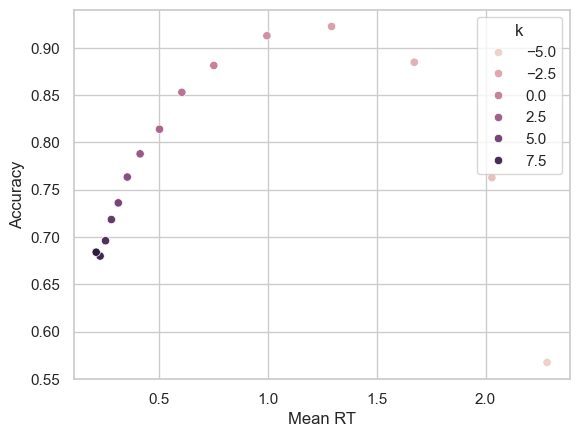

In [185]:
sns.scatterplot(x=df_all['RT'], y=df_all['choice'],hue = df_all['k'])
cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

plt.xlabel("Mean RT")
plt.ylabel("Accuracy")

In [ ]:
df_all['k_binned'] = pd.cut(df_all['k'], bins=10)  # Adjust 'bins' as needed

# Then plot using 'k_binned' as the hue
g = sns.relplot(
    data=df_all,
    x="RT", y="choice",
    hue="k_binned",  # Use the binned variable for hue
    palette="cubehelix"  # Adjust palette as needed
)

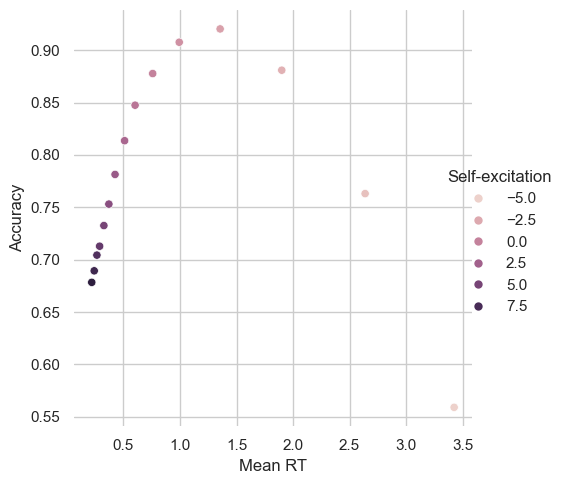

In [179]:
sns.set_theme(style="whitegrid")

# Load the example planets dataset

cmap = sns.cubehelix_palette(n_colors=6, as_cmap=True)
g = sns.relplot(
    data=df_all,
    x="RT", y="choice",
    hue="k",
    palette=cmap,
)
g.ax.xaxis.grid(True, "minor", linewidth=.5)
g.ax.yaxis.grid(True, "minor", linewidth=.5)
g.despine(left=True, bottom=True)
plt.xlabel("Mean RT")
plt.ylabel("Accuracy")
g._legend.set_title("Self-excitation")
